#Loading libraries

In [74]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet
from statsmodels.tools.eval_measures import rmse
from fbprophet.plot import add_changepoints_to_plot

#Loading Data

In [75]:
#Loading data
data = pd.read_csv('/content/airline_passengers.csv')

#Checking Data

In [76]:
#Checking data
data

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


#Checking data info

In [77]:
#Checking data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Month                    144 non-null    object
 1   Thousands of Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


Date have object data type

#Changing the columns names

In [78]:
#Changing the name of columns
data.columns = ['ds', 'y']

#Changing data type of date as datetime format

In [79]:
#Changing the date into datetime
data['ds'] = pd.to_datetime(data['ds'])

In [80]:
#Checking the data type
data.dtypes

ds    datetime64[ns]
y              int64
dtype: object

#Plotting the data

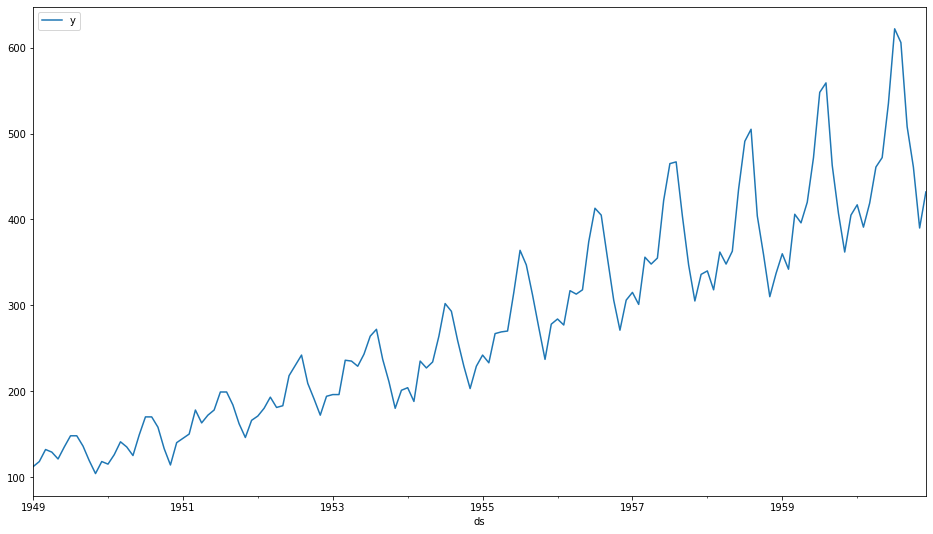

In [81]:
#Plotting the data
data.plot(x = 'ds', y = 'y', figsize = (16,9));

#Creating Facebook Prophet Model

In [82]:
#Creating facebook prophat model with default parameters
m = Prophet()

#Fitting the model
m.fit(data)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


#Forecasting on the model on next 50 months

In [83]:
#Creating dataframe for period
future = m.make_future_dataframe(periods=50, freq = 'MS')

#Forecasting on the data
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,106.727984,56.356320,113.071590,106.727984,106.727984,-21.920631,-21.920631,-21.920631,-21.920631,-21.920631,-21.920631,0.0,0.0,0.0,84.807353
1,1949-02-01,108.901201,48.146817,106.498589,108.901201,108.901201,-30.682847,-30.682847,-30.682847,-30.682847,-30.682847,-30.682847,0.0,0.0,0.0,78.218354
2,1949-03-01,110.864107,81.805354,138.836467,110.864107,110.864107,-0.502710,-0.502710,-0.502710,-0.502710,-0.502710,-0.502710,0.0,0.0,0.0,110.361397
3,1949-04-01,113.037323,75.164426,136.296765,113.037323,113.037323,-5.185501,-5.185501,-5.185501,-5.185501,-5.185501,-5.185501,0.0,0.0,0.0,107.851823
4,1949-05-01,115.140437,81.204844,138.918239,115.140437,115.140437,-3.788702,-3.788702,-3.788702,-3.788702,-3.788702,-3.788702,0.0,0.0,0.0,111.351735


In [84]:
#Extracting columns
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [85]:
#Displaying 'ds', 'yhat_lower', 'yhat_upper', 'yhat'
forecast[['ds', 'yhat_lower', 'yhat_upper', 'yhat']]

,ds,yhat_lower,yhat_upper,yhat
0,1949-01-01,56.356320,113.071590,84.807353
1,1949-02-01,48.146817,106.498589,78.218354
2,1949-03-01,81.805354,138.836467,110.361397
3,1949-04-01,75.164426,136.296765,107.851823
4,1949-05-01,81.204844,138.918239,111.351735
...,...,...,...,...
189,1964-10-01,573.630893,633.537013,603.285088
190,1964-11-01,539.105780,598.296496,568.543428
191,1964-12-01,568.034615,625.883952,597.700404
192,1965-01-01,581.722220,641.113090,612.327333


#Visualizing the Actual data vs Forecast data

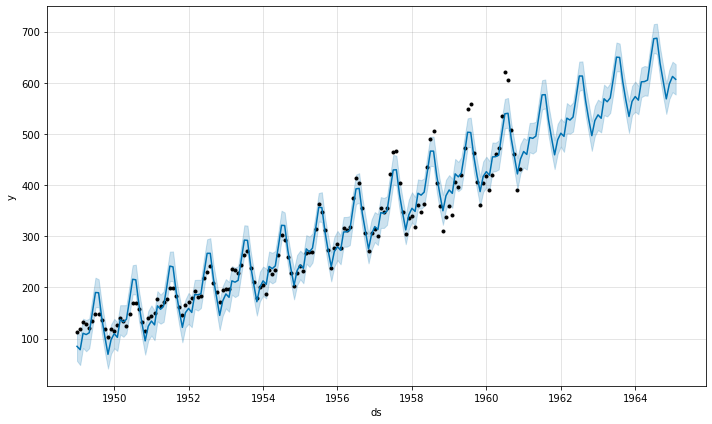

In [86]:
#Plotting data
m.plot(forecast);

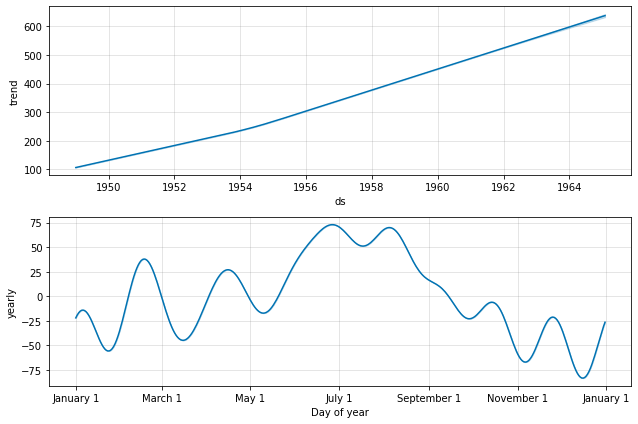

In [88]:
#Plotting component
m.plot_components(forecast);

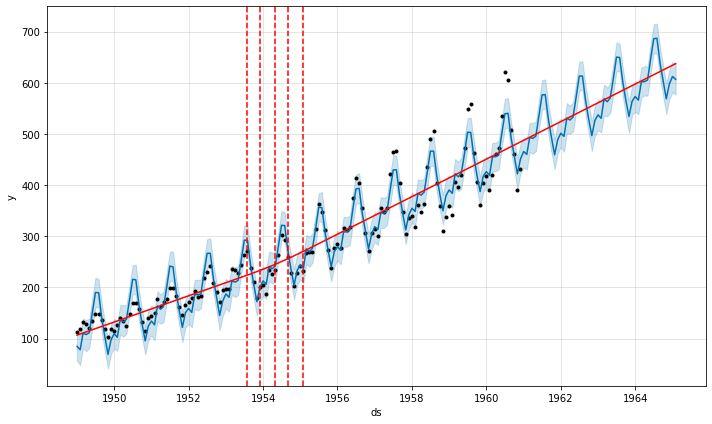

In [89]:
#Plotting trend points
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(),m,forecast);

Changing seasonality

In [90]:
#Creating facebook prophat model
m = Prophet(seasonality_mode='multiplicative')

#Fitting the model
m.fit(data)

#Creating dataframe for period
future = m.make_future_dataframe(periods=50, freq = 'MS')

#Forecasting on the data
forecast = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


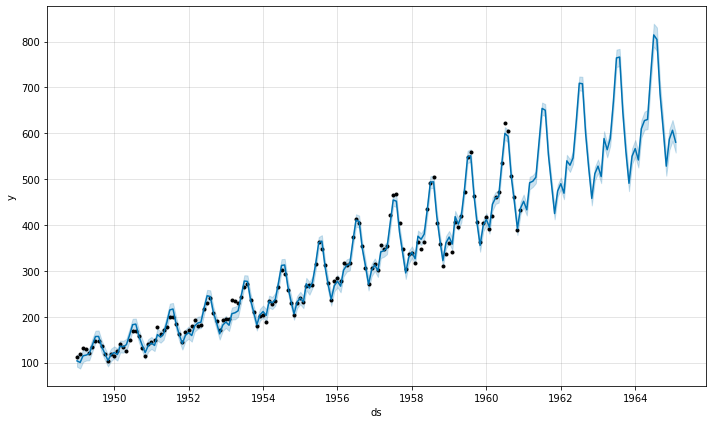

In [91]:
#Plotting data
m.plot(forecast);

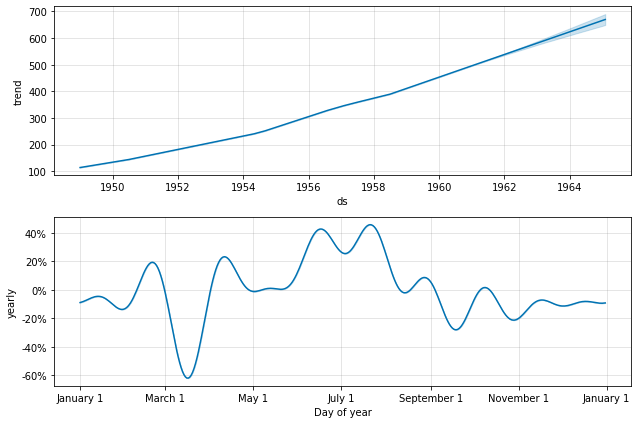

In [92]:
#Plotting component
m.plot_components(forecast);